<a href="https://colab.research.google.com/github/anadebattista/TMnews/blob/master/TMnews_2_Analisis_Exploratorio_y_Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Minería de Textos 2019**
**Trabajo Final:** 

**Profesor:** Dr. Marcelo Errecalde

**Alumnos:** 
*   M.Cs. Anabella De Battista
*   Ing. Esteban Schab

---
#**Fase de Obtención y Preparación de los Textos**

---


---

Conexión de Collaboratory con Google Drive

---

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


---

Seteo de directorio de trabajo

---

In [0]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Curso Mineria Textos 2019/data")

---

Se importa el repositorio de noticias generado en la etapa anterior (newsoctubre2019.csv)

---

In [0]:
import pandas as pd 
news = pd.read_csv('newsoctubre2019.csv')
news

,news_paper,category,link,date,title,abstract,author,key_words,body
0,clarin,deportes,https://www.clarin.com//deportes/escandalo-aud...,2019-10-01,"“¿Por qué no te ponés a dieta?”, el escándalo ...",Se difundió un mensaje del referí Germán Bermú...,[],Federico BeligoyArbitrosPrueba,Germán Bermúdez es referí en las categorías de...
1,clarin,deportes,https://www.clarin.com//deportes/espana-hablan...,2019-10-01,En España hablan de una fractura en el Barcelo...,El diario El País dice que la contratación de ...,[],FC BarcelonaLionel MessiAntoine GriezmannNeymar,Barcelona no mira a todos desde arriba. Ya no....
2,clarin,deportes,https://www.clarin.com//deportes/superclasico-...,2019-10-01,Superclásico: qué dicen los astros para el Riv...,"En la previa del partido de ida, dos reconocid...",[],River PlateBoca JuniorsSuperclásicoCopa Libert...,"Ya sean creyentes o escépticos, la ansiedad po..."
3,clarin,deportes,https://www.clarin.com//deportes/river-boca-co...,2019-10-01,"River-Boca, por la Copa Libertadores: cómo est...",Las fuertes tormentas que cayeron sobre la ciu...,[],Copa LibertadoresSuperclásicoRiver PlateBoca J...,El duelo de ida por las semifinales de la Copa...
4,clarin,deportes,https://www.clarin.com//deportes/mundial-atlet...,2019-10-01,"El Mundial de atletismo, envuelto en el drama ...",La IAAF está en la mira por haber permitido qu...,Luciana Aranguiz,AtletismoDoha,La imagen se repitió una y otra vez en las pri...
...,...,...,...,...,...,...,...,...,...
37640,lanacion,tecnologia,http://www.lanacion.com.ar//tecnologia/como-z-...,2019-10-29,Como una Z: así es el prototipo de TCL de un s...,NaN,NaN,NaN,TCL presentó por estos días un prototipo de un...
37641,lanacion,tecnologia,http://www.lanacion.com.ar//tecnologia/lanzan-...,2019-10-29,Lanzan una app gratis para ayudar a los partid...,NaN,Sebastián Davidovsky,NaN,Una aplicación colaborativa que les facilite a...
37642,lanacion,tecnologia,http://www.lanacion.com.ar//tecnologia/youtube...,2019-10-29,YouTube presenta su primera película interacti...,NaN,NaN,NaN,YouTube publicó el adelanto de \r\nA Heist Wit...
37643,lanacion,tecnologia,http://www.lanacion.com.ar//tecnologia/apple-p...,2019-10-29,Apple planea lanzar una función para crear Mem...,NaN,NaN,NaN,Los Memojis son las ilustraciones personalizad...


---

Estadísticas descriptivas del dataset

---

In [0]:
news.describe()

,news_paper,category,link,date,title,abstract,author,key_words,body
count,37645,37645,37645,37645,37645,23525,29169,7606,37394
unique,3,6,9169,28,9548,6340,610,2204,10439
top,lanacion,tecnologia,https://www.infobae.com//teleshow/2019/10/12/l...,2019-10-18,Agenda Vida Digital,[],[],Dólar Hoy,Jimena Barón mostró su nuevo tatuaje y explicó...
freq,15186,6874,33,1797,87,53,16349,66,33


---

**Selección, limpieza y transformación**


---



---

El script de descarga de noticias se ejecuta 3 veces durante un día, por lo que algunas noticias que no se modifican pueden aparecer 3 veces en un mismo día.
En algunas ocasiones el diario actualiza el texto de alguna noticia durante el día, por lo que se puede observar que se mantiene el título pero se modifica el body de alguna noticia.

A continuación se presenta una tabla en la que se puede visualizar que la longitud del campo body de la noticia con ID = 7574, 7625, 7639 ha cambiado durante el día.

Para este trabajo se decidió no eliminar noticias duplicadas.

---


In [0]:
noticiassubset = news[['link','body','title','date']]
noticiassubset
noticiassubset['lenghtBody'] = noticiassubset['body'].apply(len) 
#export_csv = noticiassubset.to_csv (r'/content/TMnews/data/export_dataframeSub.csv', index = None, header=True)
noticiassubset.loc[[7574,7625,7639]]



---


Como se detecta que BODY tiene algunos registros NA...

---

In [0]:
news[['title','body']].describe()

,title,body
count,37645,37394
unique,9548,10439
top,Agenda Vida Digital,Jimena Barón mostró su nuevo tatuaje y explicó...
freq,87,33


---

... se eliminan los registros cuyos title o body son NA

---

In [0]:
news_clean = news.dropna(subset=['title','body'])
news_clean.describe()

,news_paper,category,link,date,title,abstract,author,key_words,body
count,37394,37394,37394,37394,37394,23423,29044,7549,37394
unique,3,6,9118,28,9505,6329,609,2201,10439
top,lanacion,tecnologia,https://www.infobae.com//teleshow/2019/10/12/l...,2019-10-18,Agenda Vida Digital,Todo lo que sucedió en el mundo del espectácul...,[],Dólar Hoy,Jimena Barón mostró su nuevo tatuaje y explicó...
freq,14954,6874,33,1788,87,33,16287,66,33


---

Cantidades de noticias agrupadas por diarios (octubre 2019)

---

In [0]:
import numpy as np

# Convierte el atributo news.news_paper como category
c = news_clean.news_paper
diarios = c.astype('category').dtype
diarios.categories

# Agrupa las noticias por diario y categoría
a = news_clean.groupby(['news_paper'])

# Genera un array numpay solo con la cantidad de noticias
b = np.array(a.aggregate(np.count_nonzero)['link'])

# Genera un dataframe con la cantidad de noticias por diario 
resumen = pd.DataFrame({"Diario":diarios.categories, 
                       "Cantidad":b})
resumen

,Diario,Cantidad
0,clarin,7549
1,infobae,14891
2,lanacion,14954


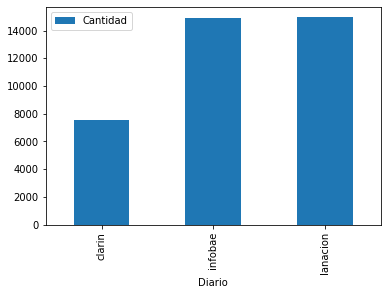

In [0]:
resumen.plot.bar(x='Diario',y='Cantidad')


---

Cantidades de noticias agrupadas por secciones (octubre 2019)

---


In [0]:
import numpy as np

# Convierte el atributo news.category como category
d = news_clean.category
secciones = d.astype('category').dtype
secciones.categories

# Agrupa las noticias por diario y categoría
e = news_clean.groupby(['category'])

# Genera un array numpay solo con la cantidad de noticias
f = np.array(e.aggregate(np.count_nonzero)['link'])

# Genera un dataframe con la cantidad de noticias por diario 
resumenSecciones = pd.DataFrame({"Sección":secciones.categories, 
                                 "Cantidad":f})
resumenSecciones

,Sección,Cantidad
0,deportes,6656
1,economia,4223
2,espectaculos,6769
3,politica,6665
4,sociedad,6207
5,tecnologia,6874


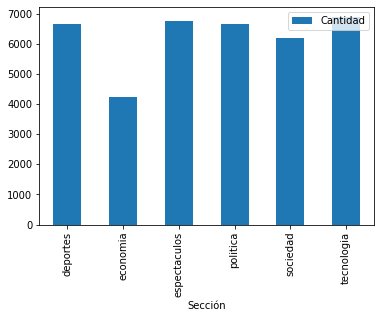

In [0]:
resumenSecciones.plot.bar(x='Sección',y='Cantidad')

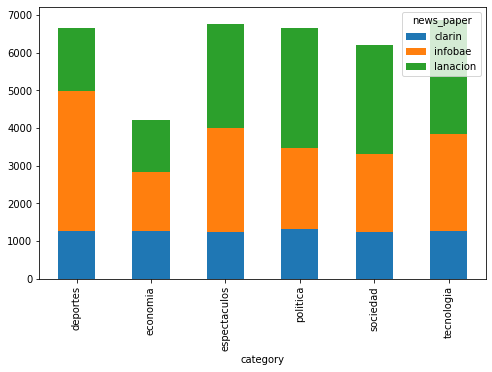

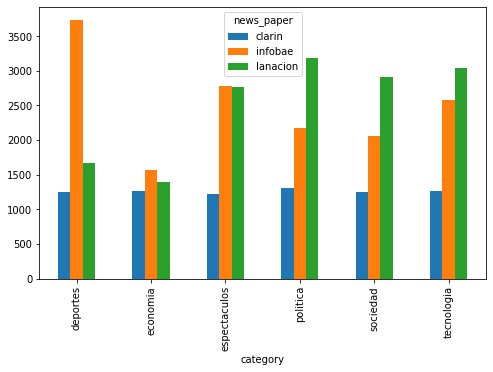

In [0]:
import numpy as np
z = news_clean.groupby(['news_paper', 'category'] )['category'].count().unstack('news_paper')
z.plot.bar(stacked=True, figsize = (8, 5))
z.plot.bar(figsize = (8, 5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fba9de11a90>,
      dtype=object)

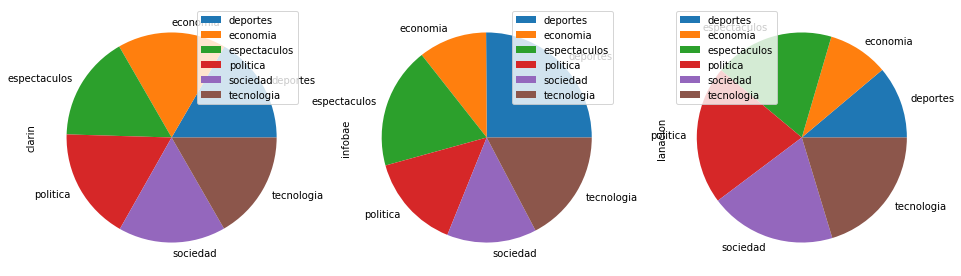

In [0]:
z = news_clean.groupby(['news_paper', 'category'] )['category'].count().unstack('news_paper')
z.plot.pie( subplots=True,figsize=(16, 8))

---

**Construcción de nuevos atributos**

Se genera el atributo *titleandbody* a partir de la concatenación de los atributos del dataset original *title* y *body*, ya que las cadenas que aparecen en dichos atributos son las que interesan en este trabajo.

---

In [0]:
news = news_clean[['news_paper','category','date']]
news['titleandbody'] = news_clean['title'].str.cat(news_clean['body'], sep =' // ')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


---

**Exportación del dataset depurado**

Se exporta el dataset depurado en formato CSV como "TMnews.csv"

---

In [0]:
TMnews = news.to_csv (r'/content/drive/My Drive/Colab Notebooks/Curso Mineria Textos 2019/data/TMnews.csv', index = None, header=True) 